In [1]:
from base import np, h5py

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap3D/"

# Generalising Step Concentrations

Concentration profile described by a spherical shell with inner radii ($r_0$) and thicknesses ($\lambda$), with the restriction $r_0 + \lambda \leq L$.

$$
c_{\text{shell}}(r; r_0,\lambda) = 
\begin{cases} 
\frac{3}{4 \pi} \frac{1}{\lambda^3 + 3 \lambda^2 r_0 + 3 \lambda r_0^2} & \text{if } r_0 \leq r \leq r_0 + \lambda, \\
0 & \text{otherwise}.
\end{cases}
$$

In [2]:
def shell_generator(rho, lambda_):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on rho and lambda_'
        cond = (r >= rho) & (r <= rho + lambda_)
        c = 3/(4*np.pi) * 1/(lambda_**3 + 3 * lambda_**2 * rho + 3 * lambda_ * rho**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 10,
    'alpha': None,
    # Number of points
    'nr': 1_000_000, # Weird triangles appear if it's too low
    'n_rho': 250,'n_lambda': 250
}
SOLVE_SYSTEM = False

### FluxMaps: $\quad \lambda \in [0, L-R_D] = [0,10-1]$

Tc/Td = 2.5133 -> Abs. ~ Dom.


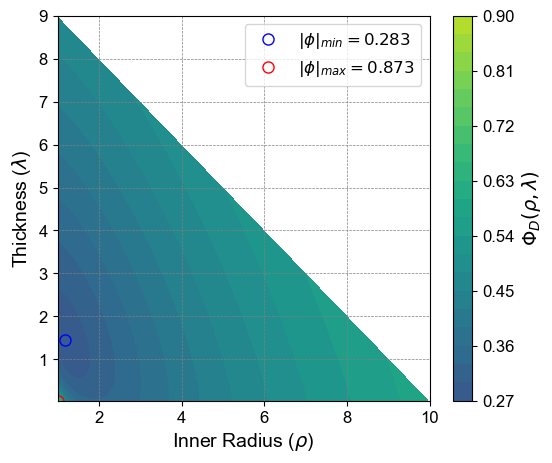

In [3]:
syst_params['alpha'] = 1e2

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data('c_shell(r)_L=10_alpha=1e2')
else:
    FM.load_data('c_shell(r)_L=10_alpha=1e2')
FM.plot(set_extremes=True, set_transition=False)
FM.save(figures_path, 'c_shell(r)_L=10_alpha=1e2')
print(f'Tc/Td = {FM.T_ratio:.4f} -> Abs. ~ Dom.')

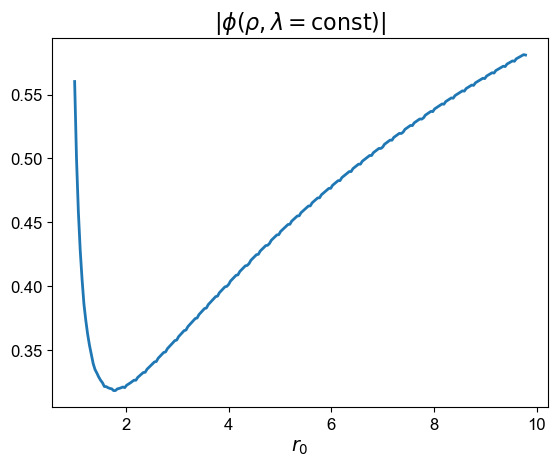

In [4]:
import matplotlib.pyplot as plt
plt.plot(FM.x_values, FM.flux_map[:,5])
plt.xlabel('$r_0$')
plt.title('$|\\phi(\\rho, \\lambda=\\text{const})|$');

Tc/Td = 25.1327 -> Diff. Dom.


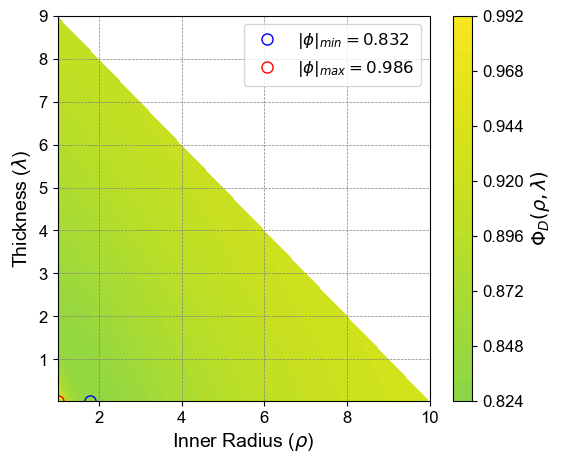

In [5]:
syst_params['alpha'] = 1e1

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data('c_shell(r)_L=10_alpha=1e1')
else:
    FM.load_data('c_shell(r)_L=10_alpha=1e1')
FM.plot(set_extremes=True, set_transition=False)
FM.save(figures_path, 'c_shell(r)_L=10_alpha=1e1')
print(f'Tc/Td = {FM.T_ratio:.4f} -> Diff. Dom.')

In [6]:
# syst_params['alpha'] = 1e0

# FM = FluxMap3D(syst_params, shell_generator)
# if SOLVE_SYSTEM:
#     FM.solve(n_jobs=-1)
#     FM.save_data('c_shell(r)_L=10_alpha=1e0')
# else:
#     FM.load_data('c_shell(r)_L=10_alpha=1e0')
# FM.plot(set_extremes=True, set_transition=False)
# FM.save(figures_path, 'c_shell(r)_L=10_alpha=1e0')
# print(f'Tc/Td = {FM.T_ratio:.4f} -> Diff. Dom.')

Tc/Td = 0.2513 -> Abs. Dom.


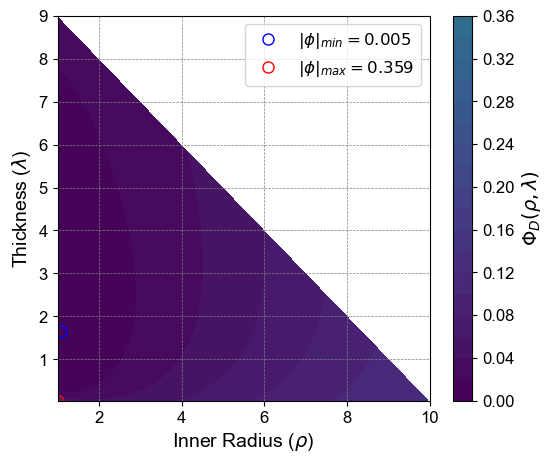

In [7]:
syst_params['alpha'] = 1e3

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data('c_shell(r)_L=10_alpha=1e3')
else:
    FM.load_data('c_shell(r)_L=10_alpha=1e3')
FM.plot(set_extremes=True, set_transition=False)
FM.save(figures_path, 'c_shell(r)_L=10_alpha=1e3')
print(f'Tc/Td = {FM.T_ratio:.4f} -> Abs. Dom.')

### FluxMaps: $\quad \lambda \in [0, L-R_D] = [0,3-1]$ ❌📄

In [8]:
syst_params['L'] = 3

Tc/Td = 0.0754


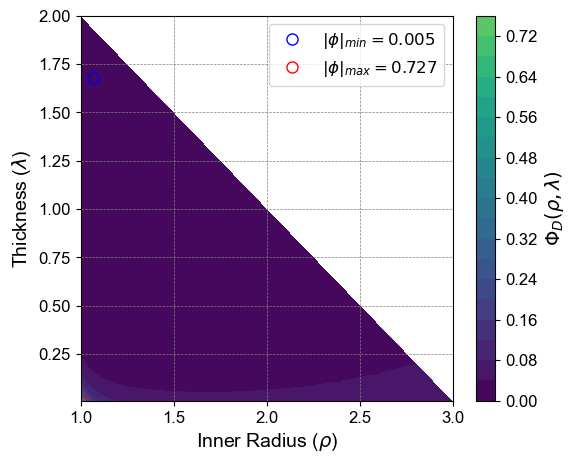

In [9]:
syst_params['alpha'] = 1e3

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data('c_shell(r)_L=3_alpha=1e3')
else:
    FM.load_data('c_shell(r)_L=3_alpha=1e3')
FM.plot(set_extremes=True, set_transition=False)
FM.save(figures_path, 'c_shell(r)_L=3_alpha=1e3')
print(f'Tc/Td = {FM.T_ratio:.4f}')

Tc/Td = 0.7540


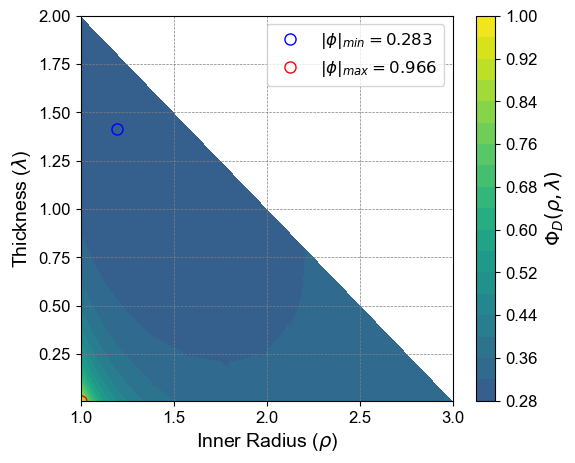

In [10]:
syst_params['alpha'] = 1e2

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data('c_shell(r)_L=3_alpha=1e2')
else:
    FM.load_data('c_shell(r)_L=3_alpha=1e2')
FM.plot(set_extremes=True, set_transition=False)
FM.save(figures_path, 'c_shell(r)_L=3_alpha=1e2')
print(f'Tc/Td = {FM.T_ratio:.4f}')

Tc/Td = 7.5398


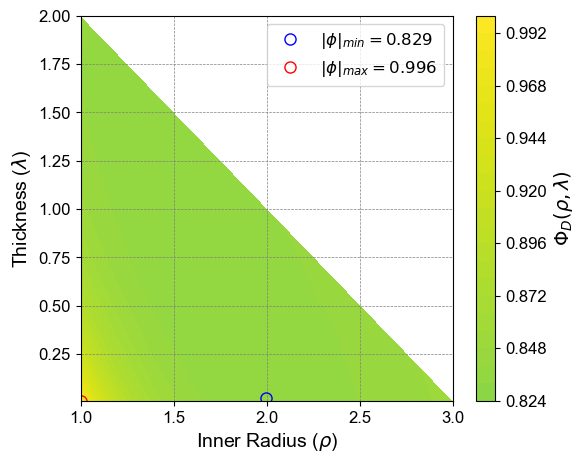

In [11]:
syst_params['alpha'] = 1e1

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data('c_shell(r)_L=3_alpha=1e1')
else:
    FM.load_data('c_shell(r)_L=3_alpha=1e1')
FM.plot(set_extremes=True, set_transition=False)
FM.save(figures_path, 'c_shell(r)_L=3_alpha=1e1')
print(f'Tc/Td = {FM.T_ratio:.4f}')

Tc/Td = 75.3982


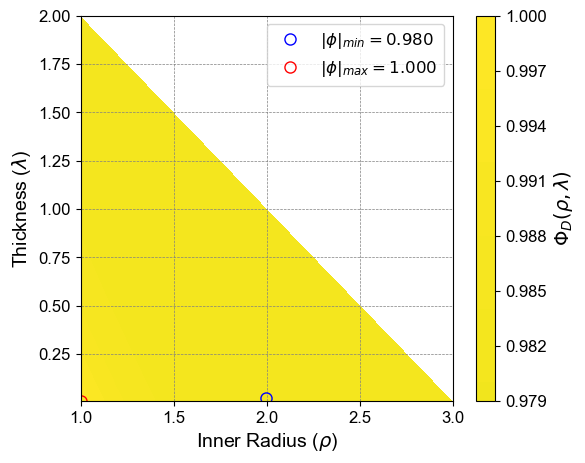

In [12]:
syst_params['alpha'] = 1e0

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data('c_shell(r)_L=3_alpha=1e0')
else:
    FM.load_data('c_shell(r)_L=3_alpha=1e0')
FM.plot(set_extremes=True, set_transition=False)
FM.save(figures_path, 'c_shell(r)_L=3_alpha=1e0')
print(f'Tc/Td = {FM.T_ratio:.4f}')